# Image Classification - Dog and Cat Breeds Multilabel Classification


## Problem Definition
This is a multi-class classification problem. 

This data set is taken from  [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. 
Our model will need to learn to differentiate between these 37 distinct categories and classify them correctly as best as possible



In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Look at the Data


In [3]:
path = untar_data(URLs.PETS)
path

PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
path_images = path/'images'
path_annot = path/'annotations'

In [6]:
fnames = get_image_files(path_images)
fnames[:5]

[PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Sphynx_80.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Ragdoll_119.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_80.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_102.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_69.jpg')]

In [7]:
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

In [8]:
bs = 64
ds_tfms = get_transforms()
data = ImageDataBunch.from_name_re(path_images, fnames, pat, ds_tfms = ds_tfms, bs = bs, size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category Sphynx, Category Ragdoll, Category Egyptian_Mau, Category pomeranian, Category boxer]...
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 500, 498), Image (3, 375, 500), Image (3, 500, 500), Image (3, 375, 500), Image (3, 332, 500)]...
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category samoyed, Category english_cocker_spaniel, Category scottish_terrier, Category leonberger, Category samoyed]...
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 500, 400), Image (3, 313, 500), Image (3, 375, 500), Image (3, 500, 333), Image (3, 500, 333)]...
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Test: None

## See the data

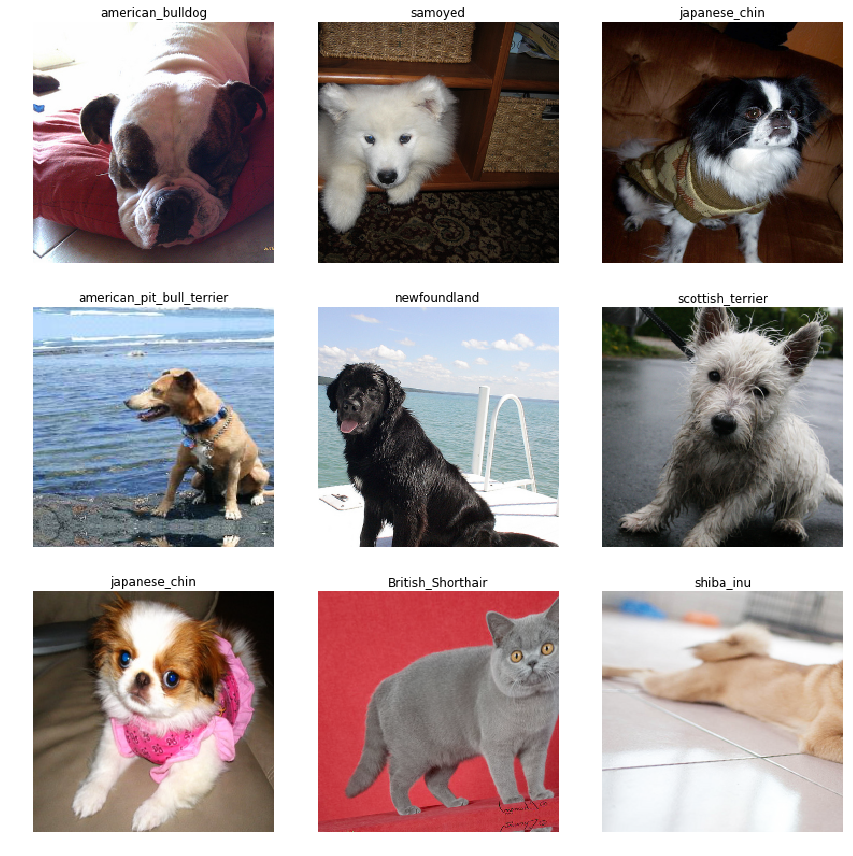

In [9]:
data.show_batch(rows = 3 , fig_size=(7, 6))

In [23]:
print(data.classes); print()
print(len(data.classes))

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

37


## Create & Train a CNN Model

In [1]:
# The cnn model creates the resnet model. Appends a single hidden layer neural network at the end of
# the resnet layer..

In [10]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.408231,0.335144,0.098106
2,0.563013,0.252387,0.082544
3,0.337209,0.214504,0.068336
4,0.251664,0.205860,0.064953


In [11]:
learn.save('stage-1')

## Results

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

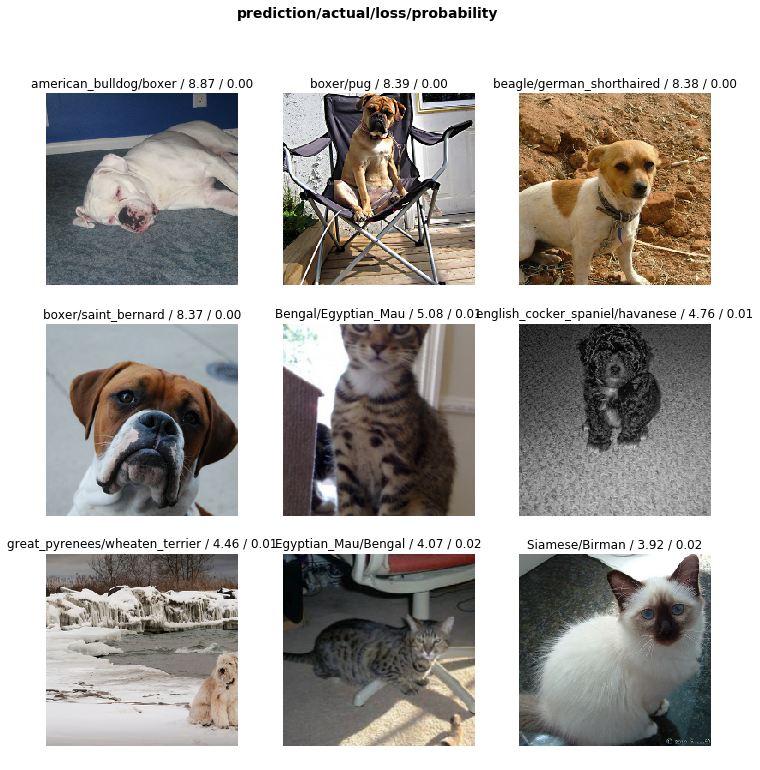

In [13]:
interp.plot_top_losses(9, figsize = (12,12))

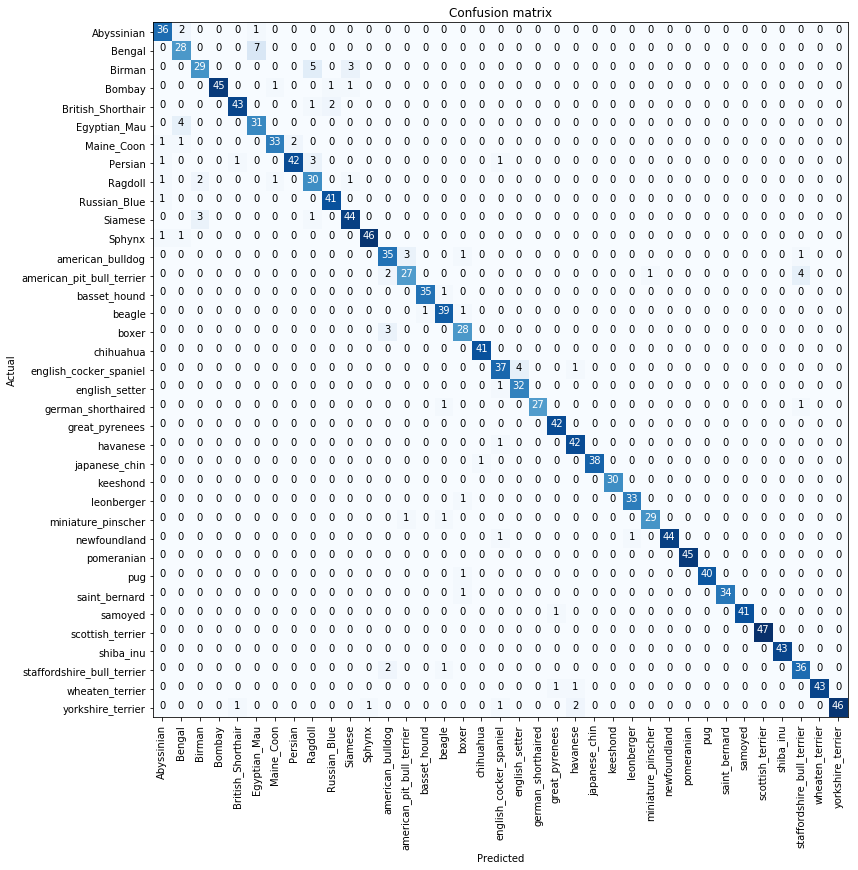

In [14]:
interp.plot_confusion_matrix(figsize = (12, 12))

In [15]:
interp.most_confused(min_val = 2)

[('Bengal', 'Egyptian_Mau', 7),
 ('Birman', 'Ragdoll', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('english_cocker_spaniel', 'english_setter', 4),
 ('Birman', 'Siamese', 3),
 ('Persian', 'Ragdoll', 3),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('boxer', 'american_bulldog', 3)]

## Fine tuning the resnet model

In [2]:
# The resnet model has different convolutional layers in it. Lets apply differential learning rate 
# to its layers. The initial layers are closer to the Imagenet model . So apply lower learning rates
# later layers can have higher learning rates

In [ ]:
learn.load('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


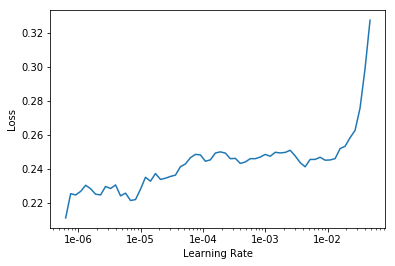

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.251040,0.198806,0.060217
2,0.201268,0.192410,0.062246


According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. 
Our model is better than their model which gives an accuracy of 94%

